In [116]:
#Lets import required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
train = pd.read_csv(r'E:\Study\DataChallenges\AV\LoanPredicton\train.csv')
test = pd.read_csv(r'E:\Study\DataChallenges\AV\LoanPredicton\test.csv')

In [118]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [119]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [120]:
#### Treating missing values
print('Count of Each Level in the training Data')
print(train.Gender.value_counts(dropna = False))

print('Count of Each Level in the test Data')
print(test.Gender.value_counts(dropna = False))


#### Missing Values can be treated as unknow here
train.Gender.fillna('unknown',inplace = True)
test.Gender.fillna('unknown',inplace = True)

Count of Each Level in the training Data
Male      489
Female    112
NaN        13
Name: Gender, dtype: int64
Count of Each Level in the test Data
Male      286
Female     70
NaN        11
Name: Gender, dtype: int64


In [121]:
#### Treating missing values of Dependents
print('Count of Each Level in the training Data')
print(train.Dependents.value_counts(dropna = False))

print('Count of Each Level in the test Data')
print(test.Dependents.value_counts(dropna = False))


#### Missing Values can be treated as unknow here
train.Dependents.fillna('unknown',inplace = True)
test.Dependents.fillna('unknown',inplace = True)

Count of Each Level in the training Data
0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64
Count of Each Level in the test Data
0      200
2       59
1       58
3+      40
NaN     10
Name: Dependents, dtype: int64


In [122]:
#### Treating missing values of Self_Employed
print('Count of Each Level in the training Data')
print(train.Self_Employed.value_counts(dropna = False))

print('Count of Each Level in the test Data')
print(test.Self_Employed.value_counts(dropna = False))


#### Missing Values can be treated as unknow here
train.Self_Employed.fillna('unknown',inplace = True)
test.Self_Employed.fillna('unknown',inplace = True)

Count of Each Level in the training Data
No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64
Count of Each Level in the test Data
No     307
Yes     37
NaN     23
Name: Self_Employed, dtype: int64


In [123]:
#### Treating missing values of Loan_Amount_Term
print('Count of Each Level in the training Data')
print(train.Loan_Amount_Term.value_counts(dropna = False)/train.shape[0])

print('Count of Each Level in the test Data')
print(test.Loan_Amount_Term.value_counts(dropna = False)/test.shape[0])


#### Missing Values can be treated as 360 term as 83% of the values belong to that category
train.Loan_Amount_Term.fillna(360,inplace = True)
test.Loan_Amount_Term.fillna(360,inplace = True)

Count of Each Level in the training Data
 360    0.833876
 180    0.071661
 480    0.024430
NaN     0.022801
 300    0.021173
 240    0.006515
 84     0.006515
 120    0.004886
 60     0.003257
 36     0.003257
 12     0.001629
Name: Loan_Amount_Term, dtype: float64
Count of Each Level in the test Data
 360    0.847411
 180    0.059946
 480    0.021798
 300    0.019074
NaN     0.016349
 240    0.010899
 84     0.008174
 350    0.002725
 120    0.002725
 60     0.002725
 36     0.002725
 12     0.002725
 6      0.002725
Name: Loan_Amount_Term, dtype: float64


In [124]:
#### Treating missing values of Married Varibale
print('Count of Each Level in the training Data')
print(train.Married.value_counts(dropna = False)/train.shape[0])

print('Count of Each Level in the test Data')
print(test.Married.value_counts(dropna = False)/test.shape[0])


#### The observations with missing values in married calumn can be removed as they are very less in number about 0.5%
train = train.dropna(subset = ['Married'])

Count of Each Level in the training Data
Yes    0.648208
No     0.346906
NaN    0.004886
Name: Married, dtype: float64
Count of Each Level in the test Data
Yes    0.634877
No     0.365123
Name: Married, dtype: float64


In [125]:
print(train.shape)
print(test.shape)

(611, 13)
(367, 12)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5032E5BA8>]], dtype=object)

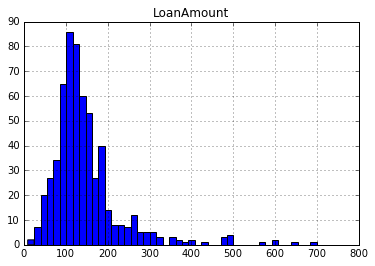

In [126]:
#### Treating missing values of LoanAmount Varibale
train.hist(column = 'LoanAmount',bins = 45)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1e503433828>],
 'caps': [<matplotlib.lines.Line2D at 0x1e50343aba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1e503446a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1e503440c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1e5034339e8>,
  <matplotlib.lines.Line2D at 0x1e50343aa90>]}

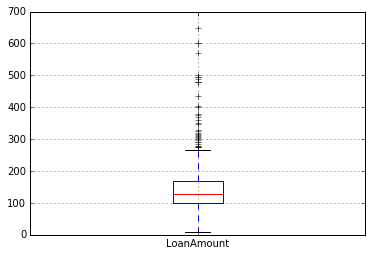

In [127]:
train.boxplot(column = 'LoanAmount')

In [128]:
### We can impute misisng values using the mean of the LoanAmount
train.LoanAmount.fillna(train.LoanAmount.mean(),inplace= True)
test.LoanAmount.fillna(test.LoanAmount.mean(),inplace= True)

In [129]:
### Lets create a new variable by adding ApplicantIncome and CoapplicantIncome
train['Total_Income'] = train.ApplicantIncome + train.CoapplicantIncome
test['Total_Income'] =  test.ApplicantIncome + test.CoapplicantIncome


train['Income_Loan_Ratio'] = train.Total_Income/train.LoanAmount
test['Income_Loan_Ratio'] = test.Total_Income/test.LoanAmount

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5020702E8>]], dtype=object)

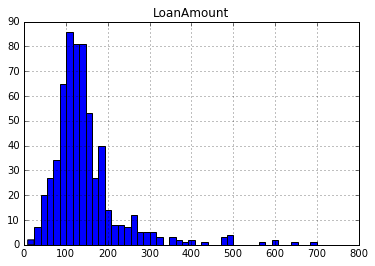

In [130]:

### As the LoanAmount looks skewed, we can apply a log transfrom to the LoanAmount to make it normal
train.hist(column = 'LoanAmount',bins = 45)

In [131]:

train['LoanAmount_LogTrans'] = np.log(train.LoanAmount)
test['LoanAmount_LogTrans'] = np.log(test.LoanAmount)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5033B3EB8>]], dtype=object)

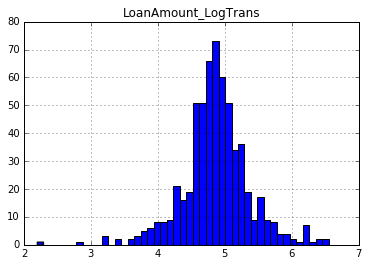

In [132]:
train.hist(column = 'LoanAmount_LogTrans',bins = 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E50354F940>]], dtype=object)

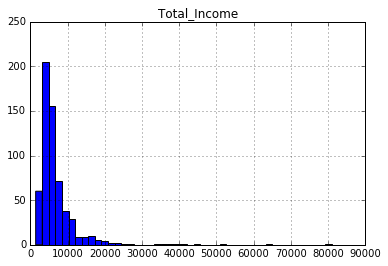

In [133]:
train.hist(column = 'Total_Income',bins = 45)

In [150]:
# Need to apply log transform to the total_income varibale as well

train['Total_Income_LogTrans'] = np.log(train.Total_Income)
test['Total_Income_LogTrans'] = np.log(test.Total_Income)

train['ApplicantIncome_LogTrans'] = np.log(train.ApplicantIncome)
test['ApplicantIncome_LogTrans'] = np.log(test.ApplicantIncome)

train['CoapplicantIncome_LogTrans'] = np.log(train.CoapplicantIncome+0.1)
test['CoapplicantIncome_LogTrans'] = np.log(test.CoapplicantIncome+0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5036EDD30>]], dtype=object)

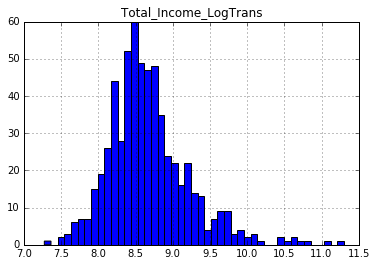

In [135]:
train.hist(column = 'Total_Income_LogTrans',bins = 45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E50374BDA0>]], dtype=object)

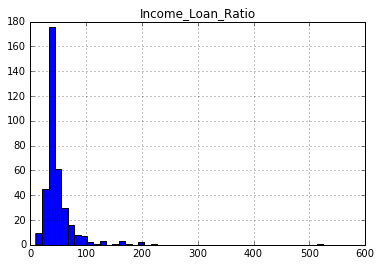

In [136]:
test.hist(column = 'Income_Loan_Ratio',bins = 45)

In [137]:
train['Income_Loan_Ratio_LogTrans'] = np.log(train.Income_Loan_Ratio)
test['Income_Loan_Ratio_LogTrans'] = np.log(test.Income_Loan_Ratio)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5038E3F28>]], dtype=object)

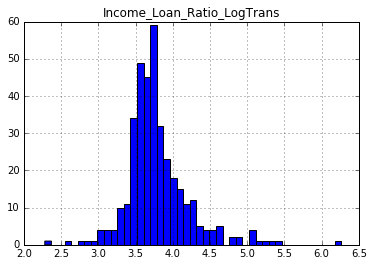

In [138]:
test.hist(column = 'Income_Loan_Ratio_LogTrans',bins = 45)

In [151]:
Target = train.Loan_Status
test_id = test.Loan_ID

col_names = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 
             'ApplicantIncome_LogTrans', 'CoapplicantIncome_LogTrans', 'LoanAmount_LogTrans','Loan_Amount_Term', 
             'Credit_History', 'Property_Area','Total_Income_LogTrans','Income_Loan_Ratio_LogTrans']

In [152]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                if output[col].dtypes == 'object' :
                    output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                if output[colname].dtypes == 'object' :
                    output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [162]:
train_fin = MultiColumnLabelEncoder(columns = col_names).fit_transform(train)
test_fin = MultiColumnLabelEncoder(columns = col_names).fit_transform(test)

cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 
             'ApplicantIncome_LogTrans', 'CoapplicantIncome_LogTrans', 'LoanAmount_LogTrans','Loan_Amount_Term', 
              'Property_Area','Total_Income_LogTrans','Income_Loan_Ratio_LogTrans']

In [171]:
CHTrain_Train = train_fin.dropna(subset = ['Credit_History'])
CHTest_Train = train[train_fin.Credit_History.isnull()]

x = CHTrain_Train[cols]
y = CHTrain_Train.Credit_History
id = CHTest_Train['Loan_ID']

In [206]:
CHTest_Train  =  MultiColumnLabelEncoder(columns = cols).fit_transform(CHTest_Train)
CHTest_Train_col = CHTest_Train[cols]

In [196]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.grid_search import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [188]:
knn = KNeighborsClassifier()
grid_param = {'n_neighbors':list(range(1,40)),'weights':['uniform','distance']}

grid_knn = GridSearchCV(knn,grid_param,cv = 10, n_jobs = -1,scoring = 'accuracy')
grid_knn.fit(x,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [191]:
grid_knn.best_score_

0.84135472370766484

In [192]:
RF = RandomForestClassifier()
grid_rf_param  = { "n_estimators" : list(range(100,1000,50)) ,
                  "bootstrap": [True, False],
                  "min_samples_split": [1, 3, 10],
                  "min_samples_leaf": [1,10,20],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"]}
grid_rf = RandomizedSearchCV(RF,grid_rf_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_rf.fit(x,y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950], 'bootstrap': [True, False], 'min_samples_split': [1, 3, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 10, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [193]:
grid_rf.best_score_

0.84135472370766484

In [198]:
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=10,n_jobs = -1,scoring = 'accuracy')
print(scores)
print(scores.mean())

[ 0.84210526  0.84210526  0.83928571  0.83928571  0.83928571  0.83928571
  0.83928571  0.83928571  0.83928571  0.85454545]
0.841375598086


In [208]:
logreg.fit(x,y)

logreg.predict(CHTest_Train_col)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [209]:
grid_knn.predict(CHTest_Train_col)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [218]:
train_fin.Credit_History.fillna(1,inplace=True)
test_fin.Credit_History.fillna(1,inplace=True)

In [220]:
x = train_fin[col_names]
y = train_fin.Loan_Status
x_test = test_fin[col_names]

In [221]:
### Logistic
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=10,n_jobs = -1,scoring = 'accuracy')
print(scores)
print(scores.mean())

[ 0.79032258  0.82258065  0.78688525  0.75409836  0.78688525  0.78688525
  0.86885246  0.85245902  0.80327869  0.83333333]
0.808558082143


In [227]:
RF = RandomForestClassifier()
grid_rf_param  = { "n_estimators" : list(range(100,1000,100)) ,
                  "bootstrap": [True, False],
                  "min_samples_split": [1, 3, 10],
                  "min_samples_leaf": [1,10,20],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"]}
grid_rf = RandomizedSearchCV(RF,grid_rf_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_rf.fit(x,y)

print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=20, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.810147299509


In [224]:
pd.Series(RF.feature_importances_,col_names)

Gender                        0.000921
Married                       0.019767
Dependents                    0.017203
Education                     0.009175
Self_Employed                 0.000677
ApplicantIncome_LogTrans      0.056714
CoapplicantIncome_LogTrans    0.032600
LoanAmount_LogTrans           0.061332
Loan_Amount_Term              0.003258
Credit_History                0.571013
Property_Area                 0.030973
Total_Income_LogTrans         0.074609
Income_Loan_Ratio_LogTrans    0.121757
dtype: float64

In [232]:
new_col_names = ['LoanAmount_LogTrans',
             'Credit_History', 'Property_Area','Total_Income_LogTrans','Income_Loan_Ratio_LogTrans']
x = train_fin[new_col_names]
y = train_fin.Loan_Status
x_test = test_fin[new_col_names]

In [233]:
### Logistic
logreg = LogisticRegression()
scores = cross_val_score(logreg,x,y,cv=10,n_jobs = -1,scoring = 'accuracy')
print(scores)
print(scores.mean())

[ 0.79032258  0.82258065  0.7704918   0.75409836  0.78688525  0.78688525
  0.83606557  0.85245902  0.7704918   0.83333333]
0.800361360832


In [234]:
RF = RandomForestClassifier()
grid_rf_param  = { "n_estimators" : list(range(100,1000,100)) ,
                  "bootstrap": [True, False],
                  "min_samples_split": [1, 3, 10],
                  "min_samples_leaf": [1,3,10],
                  "criterion": ["gini", "entropy"],
                  "max_features": ['auto',"sqrt","log2"]}
grid_rf = RandomizedSearchCV(RF,grid_rf_param,cv = 10, n_jobs = -1 , scoring= 'accuracy')
grid_rf.fit(x,y)

print(grid_rf.best_estimator_)
print(grid_rf.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=10, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.81178396072


In [236]:
pred = []
for i in grid_rf.predict(x_test):
    if i==1:
        pred.append("Y")
    else:
        pred.append("N")
        
pd.DataFrame({'Loan_ID':test_id,'Loan_Status':pred}).to_csv(r'E:\Study\DataChallenges\AV\submission6.csv')